# Preprocessing - outliers

```
Better Data > Fancier Algorithms
```
- Outliers

### Imports

In [9]:
# hide_code

# Data analysis and data wrangling
import numpy as np
import pandas as pd

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Other
from IPython.display import Image
import configparser
import subprocess
import warnings
import pprint
import time
import os

---

## Prepare Principal Directory

In [21]:
# hide_code
def prepare_directory_work(end_directory: str='notebooks'):
    # Current path
    curr_dir = os.path.dirname (os.path.realpath ("__file__")) 
    
    if curr_dir.endswith(end_directory):
        os.chdir('..')
        return curr_dir
    
    return f'Current working directory: {curr_dir}'

In [22]:
#hide_code
prepare_directory_work(end_directory='notebooks')

'Current working directory: /home/campos/projetos/artificial_inteligence/data-science/flow_analysis'

---

## Cell Format

In [1]:
# hide_code
# Guarantees visualization inside the jupyter
%matplotlib inline

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# Print xxxx rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)

# Supress unnecessary warnings so that presentation looks clean
warnings.filterwarnings('ignore')

# Pretty print
pp = pprint.PrettyPrinter(indent=4)

NameError: name 'pd' is not defined

---

## Load Data

In [24]:
%%time

df_callcenter = pd.read_csv('data/raw/callcenter_marketing.csv', 
                            encoding='utf8',
                            delimiter=',',
                            verbose=True)

Tokenization took: 37.20 ms
Type conversion took: 41.99 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 6.91 ms
Type conversion took: 7.79 ms
Parser memory cleanup took: 0.00 ms
CPU times: user 114 ms, sys: 0 ns, total: 114 ms
Wall time: 111 ms


In [98]:
%%time

df_callcenter_cleasing = pd.read_csv('data/cleansing/callcenter_marketing_clenning.csv', 
                            encoding='utf8',
                            delimiter=',',
                            verbose=True)

Tokenization took: 20.05 ms
Type conversion took: 29.81 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 2.83 ms
Type conversion took: 4.65 ms
Parser memory cleanup took: 0.00 ms
CPU times: user 62.5 ms, sys: 4.65 ms, total: 67.1 ms
Wall time: 65 ms


### Global Variables

In [89]:
def get_col(df: 'dataframe', type_descr: 'numpy') -> list:
    """
    Function get list columns 
    
    Args:
    type_descr
        np.number, np.object -> return list with all columns
        np.number            -> return list numerical columns 
        np.object            -> return list object columns
    """
    try:
        col = (df.describe(include=type_descr).columns)  # pandas.core.indexes.base.Index  
    except ValueError:
        print(f'Dataframe not contains {type_descr} columns !', end='\n')    
    else:
        return col.tolist() 

In [90]:
list_numerical_col = get_col(df=df_callcenter,
                             type_descr=np.number)
list_categorical_col = get_col(df=df_callcenter,
                               type_descr=np.object)
list_columns = get_col(df=df_callcenter,
                       type_descr=[np.object, np.number])

---

---

# Outliers

- Check if contains outliers
- Count outliers
- Check percentage
- Plot outliers
- Handler outliers
  - drop
  - mark
  - rescale

- In general, if you have a **legitimate** reason to remove an outlier, it will help your model’s performance.

- However, outliers are innocent until proven guilty. **You should never remove an outlier just because it’s a "big number." **

In [127]:
list_numerical_col = get_col(df=df_callcenter_cleasing,
                             type_descr=np.number)
list_categorical_col = get_col(df=df_callcenter_cleasing,
                               type_descr=np.object)
list_columns = get_col(df=df_callcenter_cleasing,
                       type_descr=[np.object, np.number])

Dataframe not contains <class 'object'> columns !


- A função `pandas.describe()` trás algumas informações sobre que compõem o boxplot.

In [130]:
df_callcenter_cleasing.describe()

,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
count,41170.0,41170.0,41170.0,41170.0,41170.0,41170.0,41170.0,41170.0,41170.0,41170.0,41170.0,41170.0,41170.0,41170.0,41170.0,41170.0,41170.0,41170.0,41170.0,41170.0
mean,40.0231,3.56121,0.504834,2.98159,7.28686e-05,0.547899,0.151761,0.63471,6.60785,2.97967,4.67452,0.362035,0.221326,0.173039,0.169978,93.5752,-40.503,3.6214,5166.85,0.112679
std,10.4204,2.25931,0.688431,1.83657,0.0085361,0.497706,0.358793,0.481517,2.04105,1.41151,0.958243,0.576758,1.34916,0.494996,0.45584,0.579921,4.62781,1.73454,72.3305,0.316204
min,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,92.2,-50.8,0.63,4963.0,0.0
25%,32.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,93.08,-42.7,1.34,5099.0,0.0
50%,38.0,3.0,0.0,3.0,0.0,1.0,0.0,1.0,6.0,3.0,5.0,0.0,0.0,0.0,0.0,93.75,-41.8,4.86,5191.0,0.0
75%,47.0,4.0,1.0,5.0,0.0,1.0,0.0,1.0,8.0,4.0,5.0,1.0,0.0,0.0,0.0,93.99,-36.4,4.96,5228.0,0.0
max,98.0,10.0,2.0,6.0,1.0,1.0,1.0,1.0,12.0,5.0,8.0,4.0,27.0,7.0,2.0,94.77,-26.9,5.04,5228.0,1.0


In [129]:
# quantile()

dict_quantile = {}


def calculate_quantile_by_col(df: 'dataframe', *columns: list) -> None:
    """
    Calculate boxplot
    """
    for column in columns:
        dict_col = {}
       
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1  # Interquartile range

        dict_col[column] = {'q1': q1,
                            'q3': q3,
                            'iqr': iqr}
        # add dict column in principal dict
        dict_quantile.update(dict_col)


def calculate_fence(dict_col: 'dataframe', *columns: list) -> None:
    for column in columns:
        dict_actual_col = dict_col[column]  # mount internal dict of dict_quantile
        dict_fence = {}  # auxiliar dict
        
        fence_low  = dict_actual_col['q1'] - 1.5 * dict_actual_col['iqr']
        fence_high = dict_actual_col['q3'] + 1.5 * dict_actual_col['iqr']
        
        dict_fence = {'fence_low': fence_low,
                     'fence_high': fence_high}
        
        # add dict column in principal dict
        dict_col[column].update(dict_fence)


def count_outlier(df: 'dataframe', dict_quantile: dict, *columns: list):
    for column in columns:
        # mount internal dict of dict_quantile
        dict_actual_col = dict_quantile[column]

        outlier_less_q1 = (df[column] < dict_actual_col['fence_low']).sum()  # numpy.int64
        outlier_more_q3 = (df[column] > dict_actual_col['fence_high']).sum()  # numpy.int64
        total = outlier_less_q1 + outlier_more_q3
        
        dict_outlier = {'outlier_less_q1': outlier_less_q1,
                        'outlier_more_q3': outlier_more_q3,
                        'outlier_total': total}
        
        # add dict column in principal dict
        dict_quantile[column].update(dict_outlier)
        
    print("-"*25, "Dict Quantilie", "-"*25, end='\n\n')
    return pp.pprint(dict_quantile)


def check_percentage_outlier(df: 'dataframe', dict_quantile: dict, *columns: list):
    outlier_total = 0
    total_lines = df.shape[0]
    total_cells = np.product(df.shape)
    
    print("-"*15, "OUTLIERS", "-"*15)
    print("\nSHAPE of data: {}".format(df.shape[0]))
    print("\nPERCENTAGE outlier by column:") 
    
    # by column
    for column in columns:
        dict_actual_col = dict_quantile[column]  # mount internal dict of dict_quantile
        outlier_total += dict_actual_col['outlier_total']

        quant_outlier_by_col = dict_actual_col['outlier_total']
        percentage_outlier_by_col = (quant_outlier_by_col/total_lines) * 100
        
        print("{}: {:4.4} %".format(column, percentage_outlier_by_col)) 

        
    percentage_by_line = (outlier_total/total_lines) * 100
    percentage_by_cell = (outlier_total/total_cells) * 100
        
    print("PERCENTAGE outlier by line: {:2.3} %".format(percentage_by_line))
    print("PERCENTAGE outlier by cell: {:2.3} %".format(percentage_by_cell))
    print("\nTOTAL outlier: {}".format(outlier_total))

In [132]:
# run
calculate_quantile_by_col(df_callcenter_cleasing, *list_columns)

calculate_fence(dict_quantile, *list_columns)

count_outlier(df_callcenter_cleasing, dict_quantile, *list_columns)

------------------------- Dict Quantilie -------------------------

{   'campanha_anterior': {   'fence_high': 0.0,
                             'fence_low': 0.0,
                             'iqr': 0.0,
                             'outlier_less_q1': 0,
                             'outlier_more_q3': 5625,
                             'outlier_total': 5625,
                             'q1': 0.0,
                             'q3': 0.0},
    'dia_da_semana': {   'fence_high': 7.0,
                         'fence_low': -1.0,
                         'iqr': 2.0,
                         'outlier_less_q1': 0,
                         'outlier_more_q3': 0,
                         'outlier_total': 0,
                         'q1': 2.0,
                         'q3': 4.0},
    'dias_ultimo_contato': {   'fence_high': 0.0,
                               'fence_low': 0.0,
                               'iqr': 0.0,
                               'outlier_less_q1': 0,
                          

In [133]:
check_percentage_outlier(df_callcenter_cleasing, dict_quantile, *list_columns)

--------------- OUTLIERS ---------------

SHAPE of data: 41170

PERCENTAGE outlier by column:
idade: 1.137 %
profissao: 9.113 %
estado_civil:  0.0 %
educacao:  0.0 %
inadimplente: 0.007287 %
emprestimo_moradia:  0.0 %
emprestimo_pessoal: 15.18 %
meio_contato:  0.0 %
mes:  0.0 %
dia_da_semana:  0.0 %
duracao: 4.212 %
qtd_contatos_campanha: 0.3813 %
dias_ultimo_contato: 3.643 %
qtd_contatos_total: 13.66 %
campanha_anterior: 13.66 %
indice_precos_consumidor:  0.0 %
indice_confianca_consumidor: 1.083 %
euribor3m:  0.0 %
numero_empregados:  0.0 %
resultado: 11.27 %
PERCENTAGE outlier by line: 73.3 %
PERCENTAGE outlier by cell: 3.67 %

TOTAL outlier: 30197


NOTE: rescale is part of feature engineering 

## Plot Outliers

### Box Plot

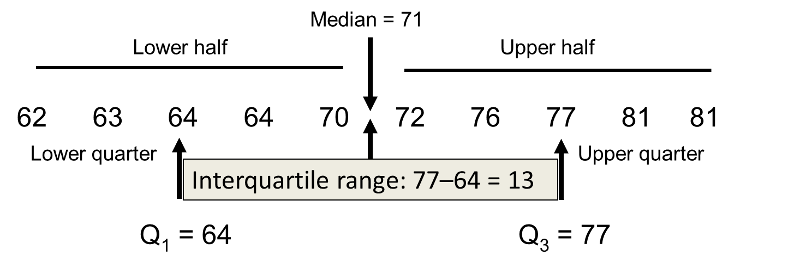

In [51]:
# hide_code
Image('reports/Interquartile-Even.png')

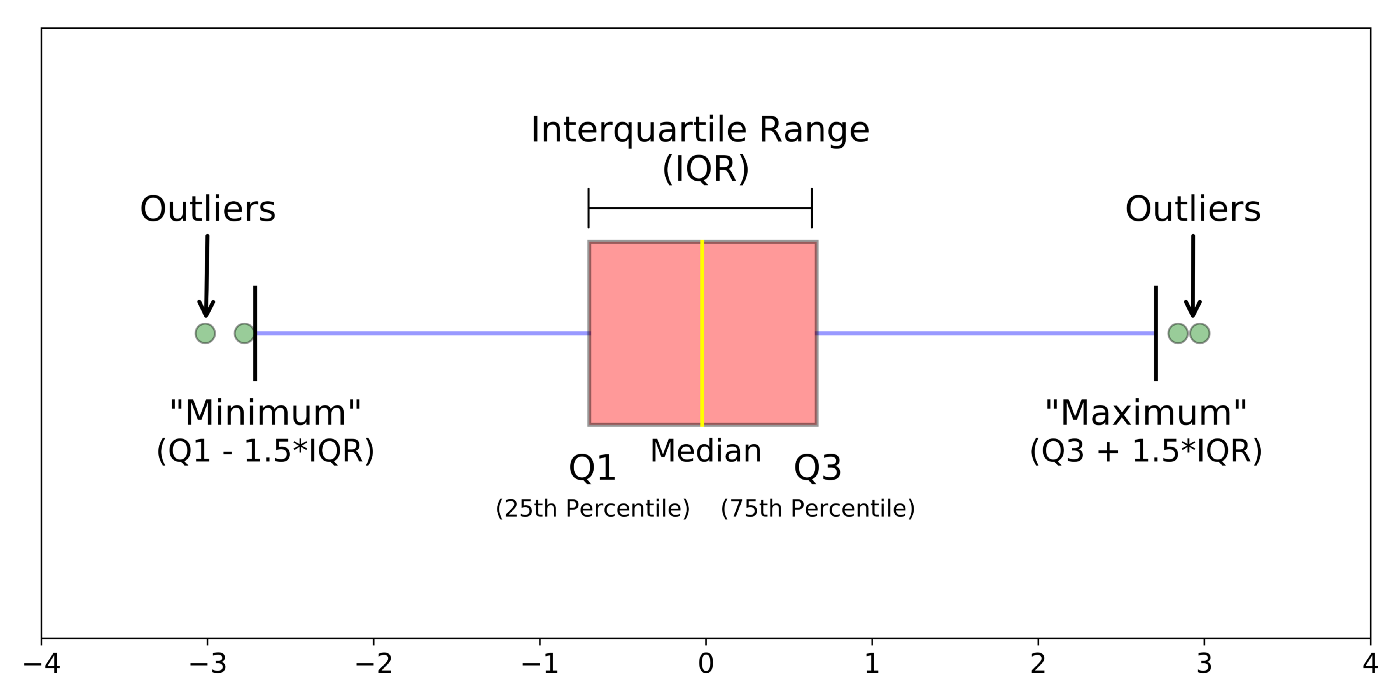

In [50]:
# hide_code
Image('reports/outliers.png')

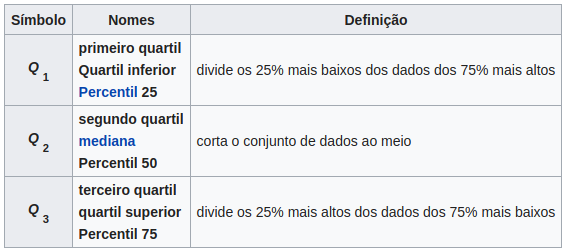

In [52]:
# hide_code
Image('reports/quartis.png')

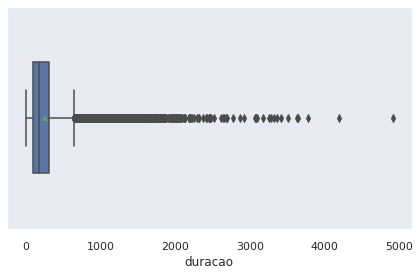

In [117]:
import seaborn as sns
sns.boxplot(x=df_callcenter['duracao'],
            width=0.5)

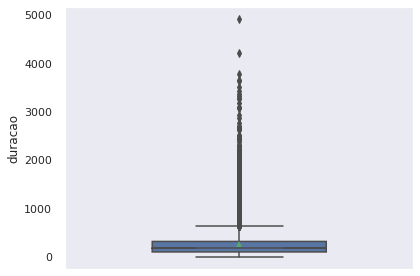

In [118]:
sns.boxplot(y=df_callcenter['duracao'],
            width=0.5,
            notch=True)

#### Fuction to execute in all features

In [119]:
def plot_box_plot(df: 'dataframe', data_set_name: str, xlim=None):
    """
    Creates a seaborn boxplot including all dependent
    
    Args:
    data_set_name: Name of title for the boxplot
    xlim: Set upper and lower x-limits
    
    Returns:
    Box plot with specified data_frame, title, and x-limits 
    """
    fig, ax = plt.subplots(figsize=(18, 10))

    if xlim is not None:
        plt.xlim(*xlim)
    
    plt.title(f"Horizontal Boxplot {data_set_name}")
        
    plt.ylabel('Dependent Variables')
    plt.xlabel('Measurement x')
    ax = sns.boxplot(data = df,
                    orient = 'h', 
                    palette = 'Set2',
                    notch = False, # box instead of notch shape 
                    sym = 'rs')  # red squares for outliers

    plt.show()

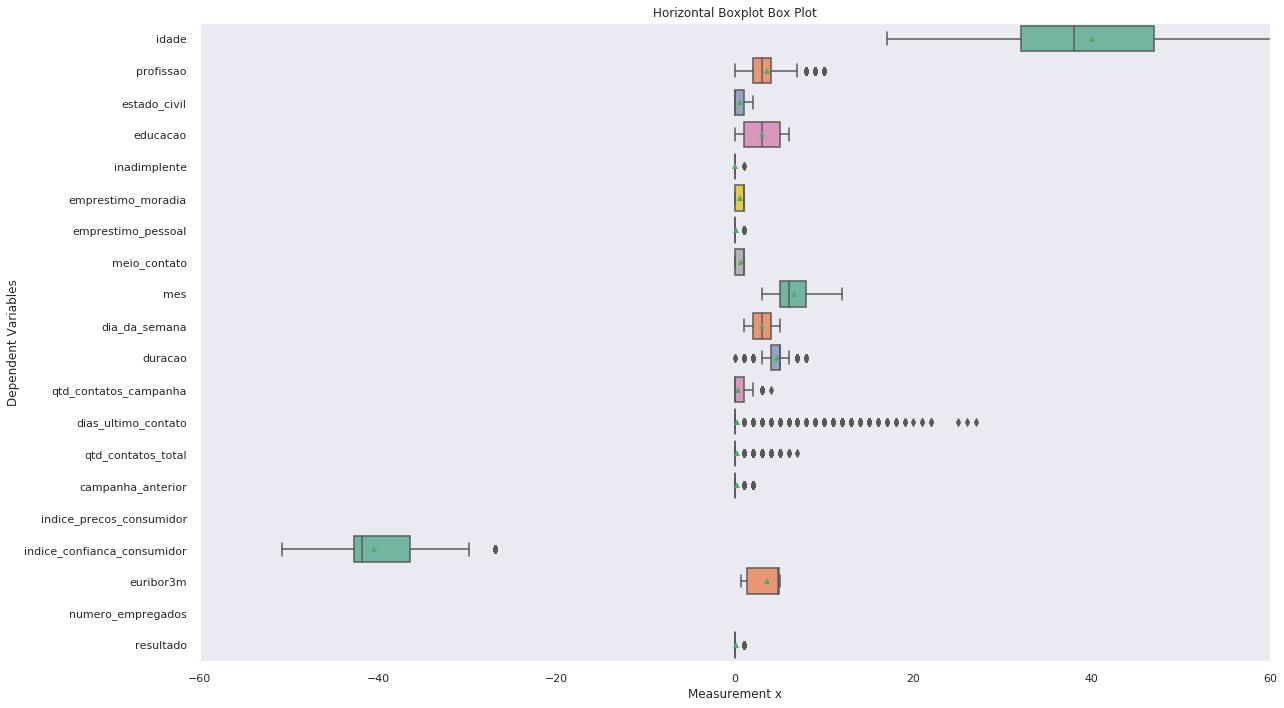

In [120]:
plot_box_plot(df_callcenter_cleasing, 
              'Box Plot', 
              (-60, 60))

In [110]:
def show_boxplot(df, *columns):
    for column in columns:
        plt.figure (figsize = (17, 1)) 
        sns.boxplot(x=df[column],
                    width=0.3,
                    linewidth=1.0,
                    showfliers=True)

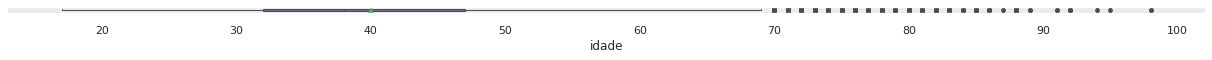

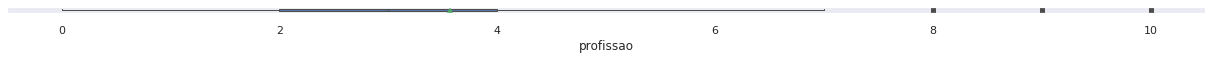

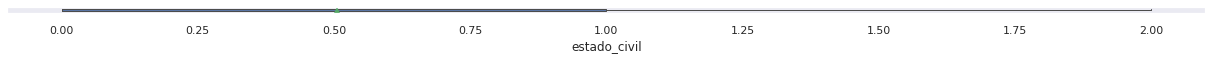

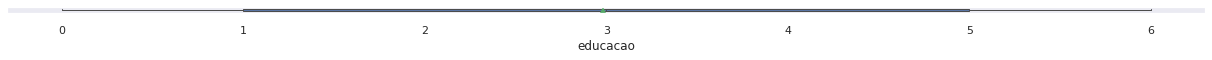

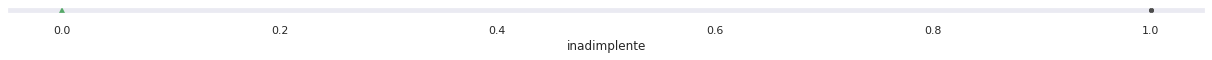

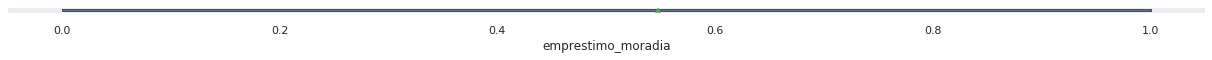

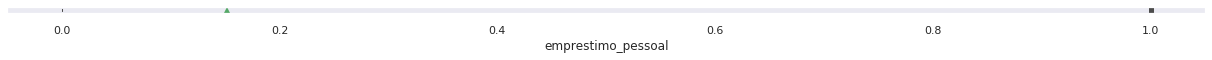

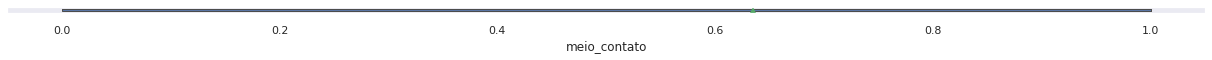

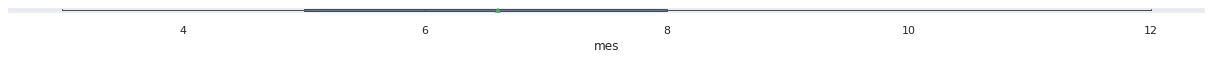

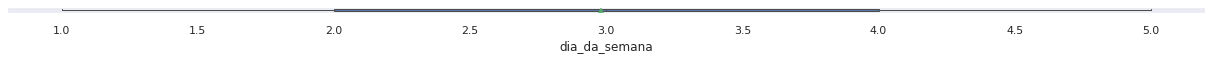

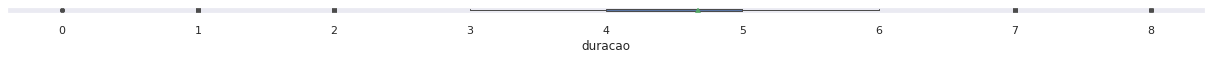

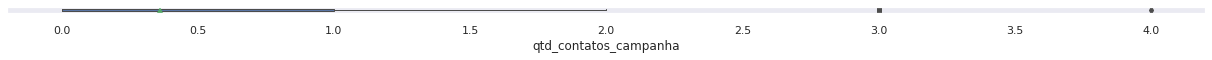

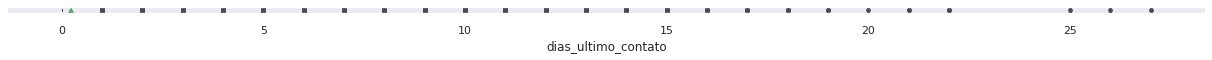

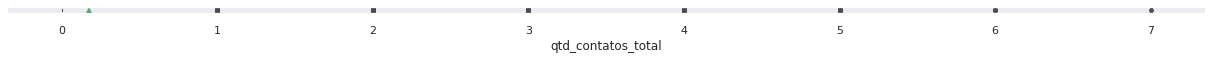

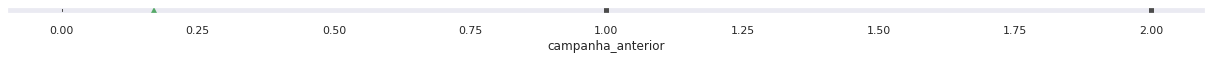

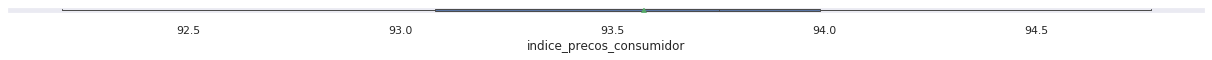

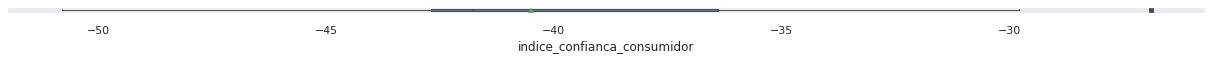

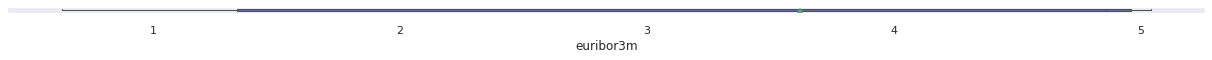

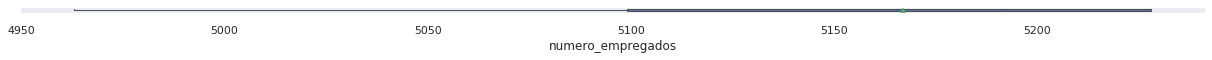

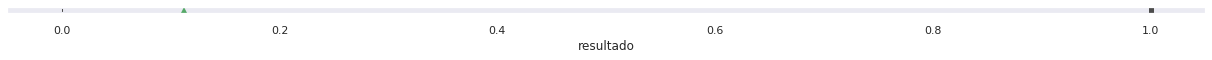

In [122]:
show_boxplot(df_callcenter_cleasing, *list_columns)

#### Boxplot on a Normal Distribution

The graph Normal ditribuition help understand a boxplot.

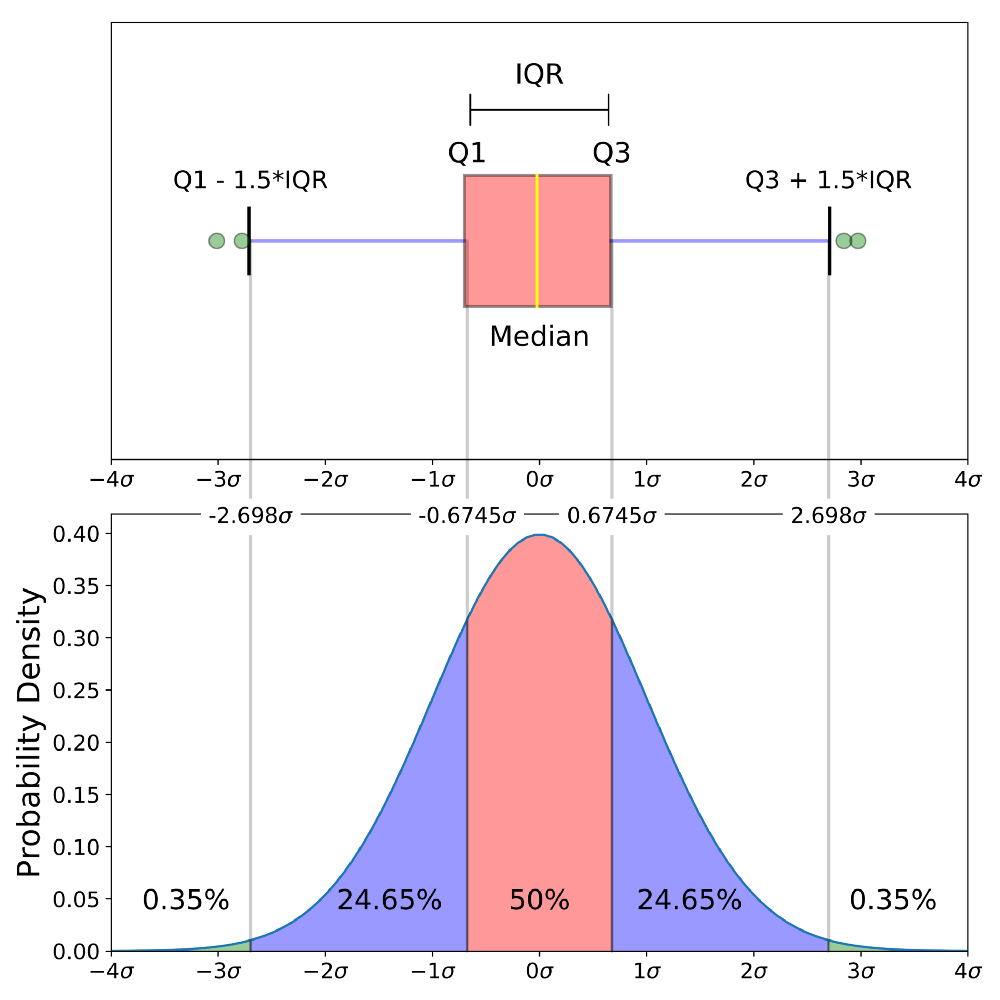

In [55]:
# hide_code
Image('reports/normal_boxplot.png')

## Remove outliers

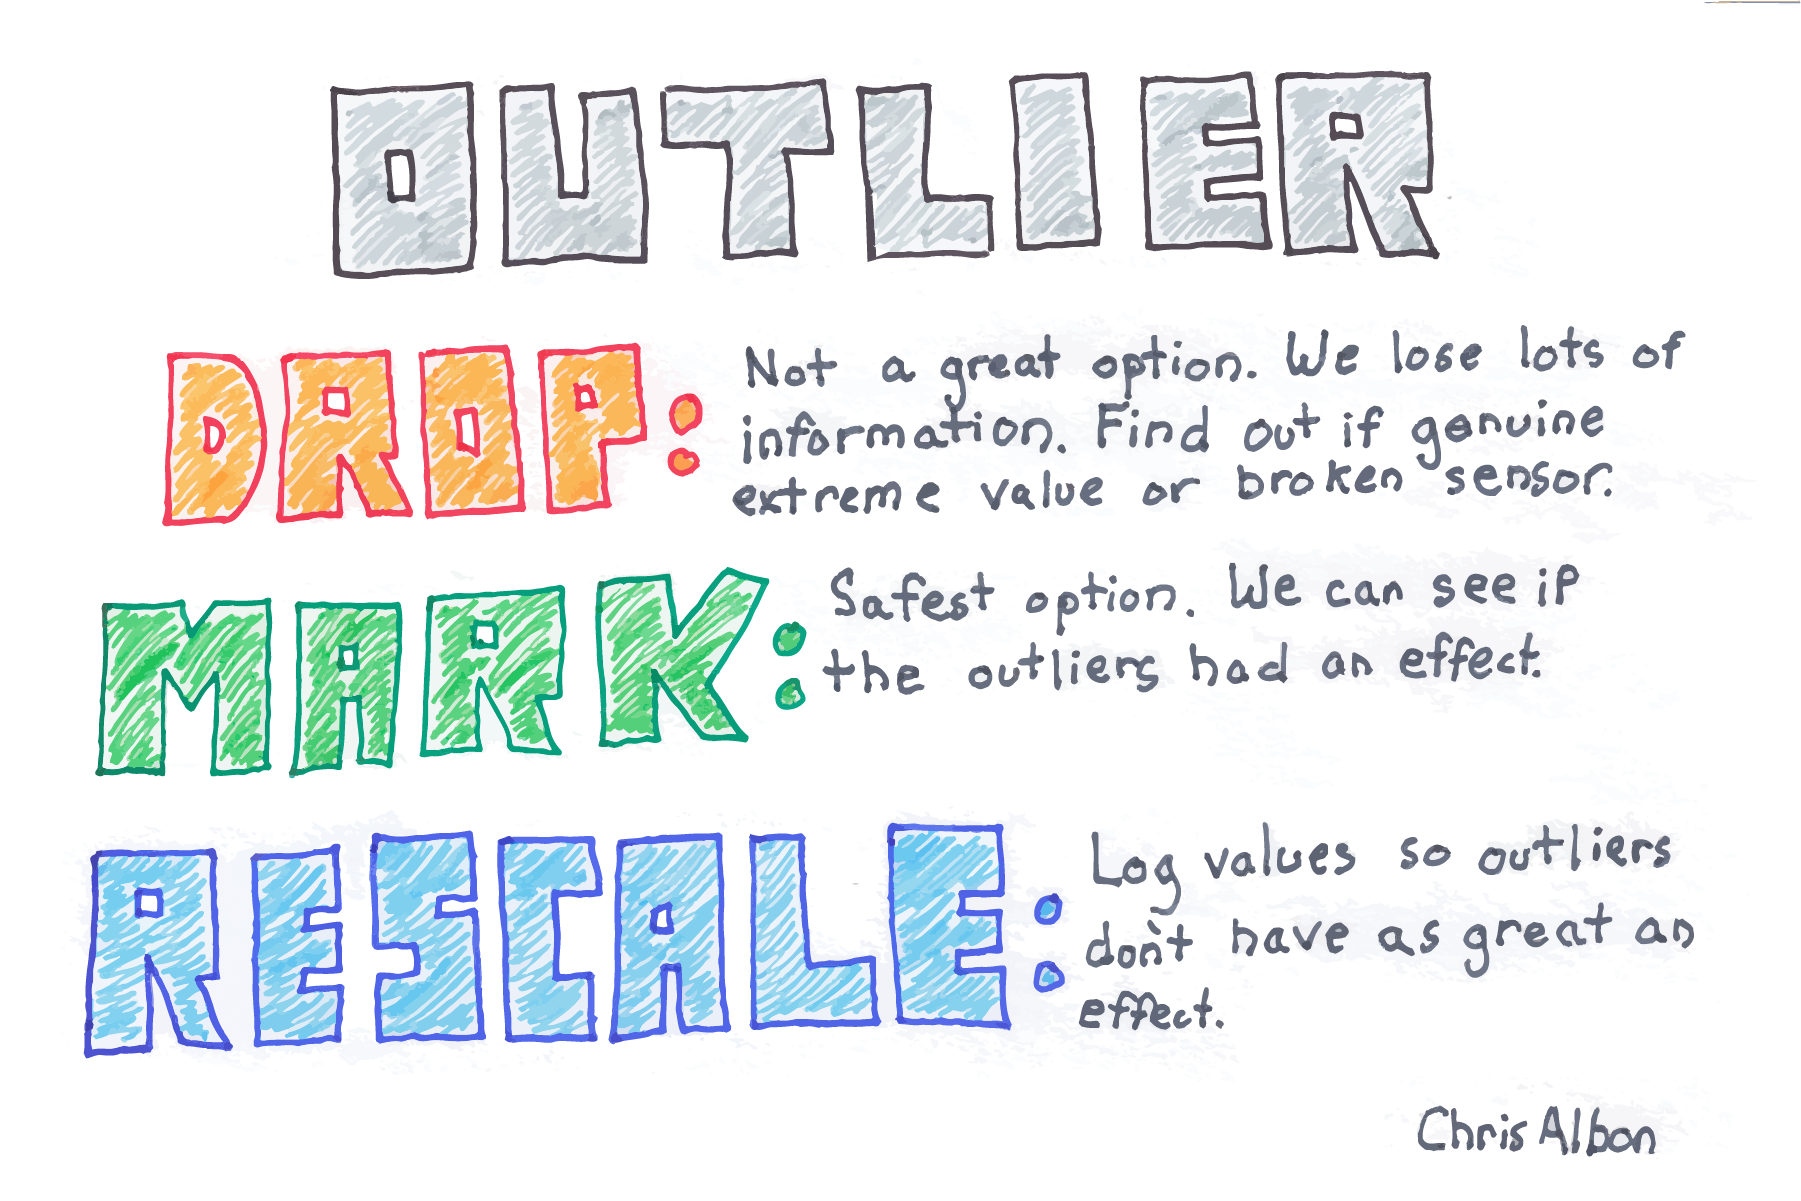

In [32]:
# hide_code
Image('references/images/Outlier_print.png')

#### Tecniques
- Drop
- Mark
- Median
- [Rescale (feature engineering)](feature_enginnering)

### Drop

1. Select conditional
  - `query()` process using `loc[]` and `eval()` 
  - `loc()`

2. Drop row
  - `drop(axis=1)`

#### Select conditional

In [33]:
df_callcenter = pd.read_csv('data/raw/callcenter_marketing.csv', 
                            encoding='utf8',
                            delimiter=',')

In [34]:
# query()
# &, |, in, !

df_result_query = df_callcenter.query('duracao == 0 & idade > 50',
                                       inplace=False)

In [35]:
display(df_result_query)

,Unnamed: 0,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
23031,23031,59,gerente,casado,graduacao_completa,nao,sim,nao,celular,ago,ter,0,10,999,0,nao_existente,93.444,-36.1,4.965,5228.1,nao
28063,28063,53,colarinho_azul,divorciado,ensino_medio,nao,sim,nao,celular,abr,sex,0,3,999,0,nao_existente,93.075,-47.1,1.479,5099.1,nao


In [36]:
# loc()
cond = df_callcenter['duracao'] == 0
cond2 = df_callcenter['idade'] > 50

df_result_loc = df_callcenter.loc[cond & cond2]

In [37]:
display(df_result_loc)

,Unnamed: 0,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
23031,23031,59,gerente,casado,graduacao_completa,nao,sim,nao,celular,ago,ter,0,10,999,0,nao_existente,93.444,-36.1,4.965,5228.1,nao
28063,28063,53,colarinho_azul,divorciado,ensino_medio,nao,sim,nao,celular,abr,sex,0,3,999,0,nao_existente,93.075,-47.1,1.479,5099.1,nao


#### Drop Row

In [38]:
df_callcenter = df_callcenter.drop(df_result_query, axis=1)

### Mark
Create feature `['outliers']` where:
 - 0 is not outlier
 - 1 is outlier

In [16]:
# hide_code
df_callcenter = pd.read_csv('data/raw/callcenter_marketing.csv', 
                            encoding='utf8',
                            delimiter=',')
list_columns_drop = ['Unnamed: 0', 'profissao', 'inadimplente', 'emprestimo_moradia',
                     'emprestimo_pessoal', 'indice_precos_consumidor', 'indice_confianca_consumidor',
                    'euribor3m', 'numero_empregados', 'dias_ultimo_contato', 'campanha_anterior',
                    'meio_contato', 'educacao', 'mes']
df_callcenter = df_callcenter.drop(list_columns_drop, axis=1)

In [17]:
# where()

# Create feature based on boolean condition
cond = df_callcenter['duracao'] < 600

# Create feature 
df_callcenter['outlier'] = np.where(cond, 0, 1)

# Show data
df_callcenter.head()

,idade,estado_civil,dia_da_semana,duracao,qtd_contatos_campanha,qtd_contatos_total,resultado,outlier
0,56,casado,seg,261,1,0,nao,0
1,57,casado,seg,149,1,0,nao,0
2,37,casado,seg,226,1,0,nao,0
3,40,casado,seg,151,1,0,nao,0
4,56,casado,seg,307,1,0,nao,0


---

## Armazenamento dos Dados Limpos

In [18]:
def save_data_clenning(df: 'dataframe' = None,
                       path: str = 'data/cleansing/') -> None:
    df.to_csv(path_or_buf = path,
              sep = ',',
              index = False,
              encoding = 'utf8')
    
    return f'saved data at {path}'

In [19]:
save_data_clenning(df = df_callcenter,
                   path = 'data/cleansing/callcenter_marketing_cleanning.csv')

'Data recorded!'